In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.4.0'

### Data (preparing and loading)

In [2]:
weight = 0.7
bias = 0.3
start = 0
end= 1
step = 0.02
X = torch.arange(start , end , step).unsqueeze(dim=1)
y = weight * X + bias

X[:10] , y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
len(X) , len(y)

(50, 50)

### spliting data into training and test sets
training set ,
validation set , 
test set ,

In [4]:
train_split = int(0.8*len(X))
X_train , y_train = X[ :train_split] , y[:train_split]
X_test , y_test = X[train_split:] , y[train_split:]
len(X_train) , len(X_test) , len(y_test) , len(y_train)

(40, 10, 10, 40)

Visualize our data !

In [5]:
def plot_predictions(train_data = X_train,
                     train_lables = y_train,
                     test_data = X_test,
                     test_lables = y_test,
                     predictions = None):
    """
    plots training data , test data and compares predictions.
    """
    plt.figure(figsize = (10,7))

    #plot training data in blue
    plt.scatter(train_data, train_lables , c="b" , s=4 , label="Training data" )

    #plot test data in green
    plt.scatter(test_data , test_lables , c="g" , s=4 , label="Testing data")

    #Are there predictions? 
    if predictions is not None:
        plt.scatter(test_data , predictions , c="r" , label="predictions")
    
    #Show the legend 
    plt.legend(prop={"size" : 14});


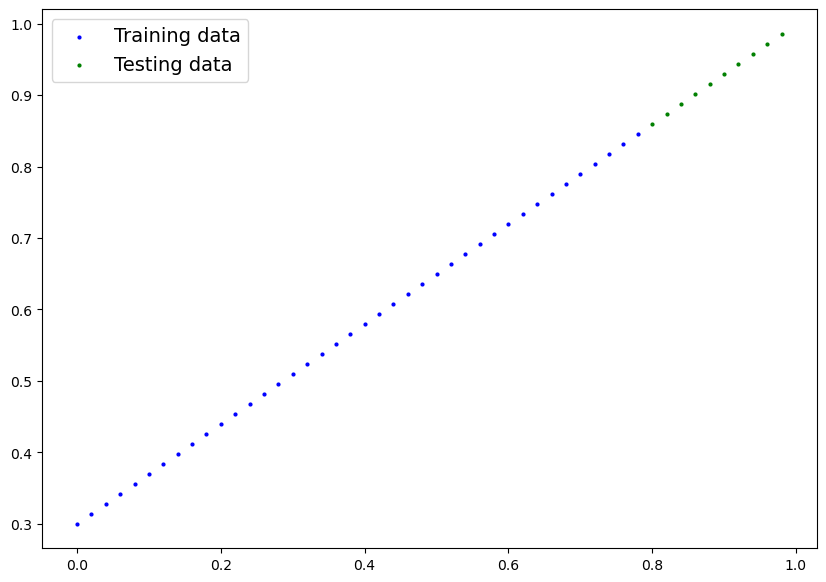

In [6]:
plot_predictions();

### Our fisrt PyTorch model! 
* Start with random values ( weight and bias)
* Look at training data and adjust the random values to better (or get closer to ) the ideal values ( the weight and bias values we used to create the data)
How?
1. Gradient descent
2. Backpropagation

* 3blue1brown youtube channel

In [7]:
from torch import nn

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights =nn.Parameter(torch.randn(1,
                                               requires_grad=True,
                                               dtype=torch.float))
        self.bias= nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
        
    #Forward method to define the computation in the model
    def forward(self, x:torch.Tensor) -> torch.Tensor :
        return self.weights * x + self.bias  
        
        


### PyTorch model building essentials
* torch.nn - contains all of the buildings for computational praphs (another word for neural networks)
* torch.nn.parameter - what parameters should our model try and learn , often a PyTorch layer from torch.nn will set these for us
* torch.nn.module - the base class for all neural network module , if you subclass it , you should overwrite forward()
* torch.optim - this where the optimizers in PyTorch live , they will help with gradient descent
* def forward() - All nn.module subclasses require you to overwrite forward() , this method defines what happens in the forward computation

In [8]:
#creating a random seed 
torch. manual_seed(42)

#create an instance of the model (this is a subclass of nn.module)
module_0 = LinearRegressionModel()

#checkout the parameters
list(module_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
#list named parameters 
module_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [10]:
weight , bias

(0.7, 0.3)

### Making prediction usung `torch.inference_mode()`

to checkout our model's predictive power , let's see how well it predicts `y_test` based on `X_test`.
when we pass data through our model , it's going to run it through the `forward()` method.


In [11]:
# Make prediction with model
X_test , y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [12]:
y_preds = module_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [13]:
with torch.inference_mode():
    y_preds = module_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

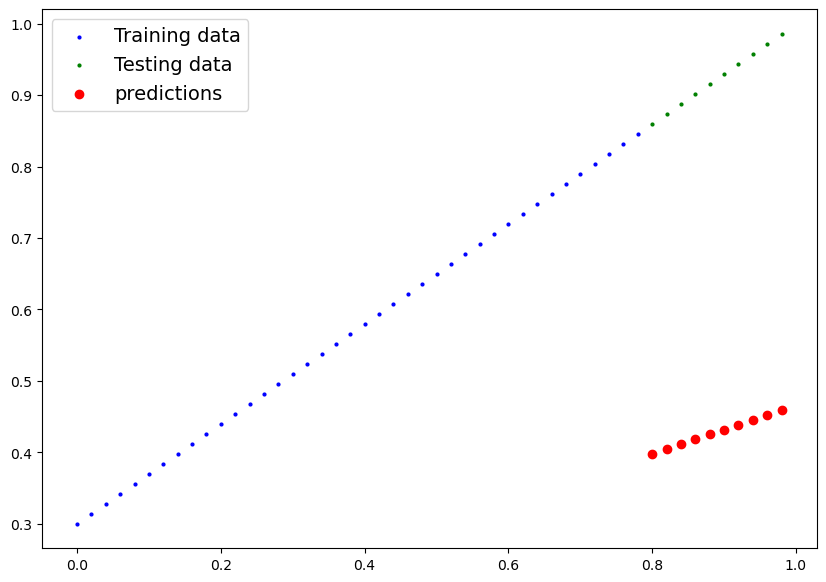

In [14]:
plot_predictions(predictions=y_preds)

### Train model 
* Using the loss functions
* optimizer

In [15]:
list(module_0.parameters())
module_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [16]:
#Setup a loss function
# nn.L1Loss
loss_fn = nn.L1Loss()

#setup an optimizer
#lr = learning rate 
optimizer = torch.optim.SGD(params=module_0.parameters(),
                            lr= 0.01)

### Building a training loop
1. Loop through the data
2. Forward pass
3. calculate the loss
4. Loss backward - **backpropagation**
5. Optimizer step - **gradient descent**

In [17]:
epochs = 200

#track different values
epoch_count= []
loss_values = []
test_loss_values =[]
# 1.Loop through the data 
for epoch in range (epochs):
    #set the model to training mode 
    module_0.train()

    #2. forward pass
    y_pred = module_0(X_train)

    #3. Calculate the loss
    loss = loss_fn(y_pred , y_train)

    #optimizer zero grad
    optimizer.zero_grad()
    #4. Loss backwards 
    loss.backward()

    #5. optimizer step
    optimizer.step()

    #testing 
    module_0.eval() #turns off different unnessasary setting for testing 
    with torch.inference_mode():
        #forward pass
        test_pred = module_0(X_test)
        #calculate the loss
        test_loss = loss_fn(test_pred , y_test)
    
    #print out what's happening
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)

        print (f"epoch : {epoch} | loss: {loss} | test loss : {test_loss} ")

    #print out model state_dict()
    print(module_0.state_dict())

epoch : 0 | loss: 0.31288138031959534 | test loss : 0.48106518387794495 
OrderedDict({'weights': tensor([0.3406]), 'bias': tensor([0.1388])})
OrderedDict({'weights': tensor([0.3445]), 'bias': tensor([0.1488])})
OrderedDict({'weights': tensor([0.3484]), 'bias': tensor([0.1588])})
OrderedDict({'weights': tensor([0.3523]), 'bias': tensor([0.1688])})
OrderedDict({'weights': tensor([0.3562]), 'bias': tensor([0.1788])})
OrderedDict({'weights': tensor([0.3601]), 'bias': tensor([0.1888])})
OrderedDict({'weights': tensor([0.3640]), 'bias': tensor([0.1988])})
OrderedDict({'weights': tensor([0.3679]), 'bias': tensor([0.2088])})
OrderedDict({'weights': tensor([0.3718]), 'bias': tensor([0.2188])})
OrderedDict({'weights': tensor([0.3757]), 'bias': tensor([0.2288])})
epoch : 10 | loss: 0.1976713240146637 | test loss : 0.3463551998138428 
OrderedDict({'weights': tensor([0.3796]), 'bias': tensor([0.2388])})
OrderedDict({'weights': tensor([0.3835]), 'bias': tensor([0.2488])})
OrderedDict({'weights': ten

In [18]:
import numpy as np
np.array(torch.tensor(loss_values).numpy()) , test_loss_values

(array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
        0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
        0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
        0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
       dtype=float32),
 [tensor(0.4811),
  tensor(0.3464),
  tensor(0.2173),
  tensor(0.1446),
  tensor(0.1136),
  tensor(0.0992),
  tensor(0.0889),
  tensor(0.0806),
  tensor(0.0723),
  tensor(0.0647),
  tensor(0.0565),
  tensor(0.0482),
  tensor(0.0406),
  tensor(0.0323),
  tensor(0.0241),
  tensor(0.0165),
  tensor(0.0082),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050)])

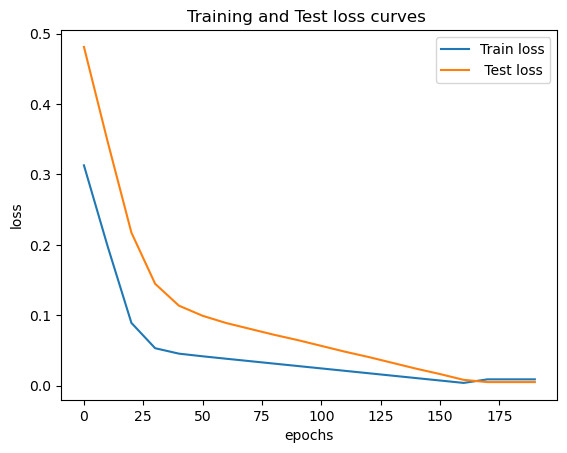

In [19]:
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label ="Train loss")
plt.plot(epoch_count, test_loss_values , label = " Test loss")
plt.title("Training and Test loss curves ")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend();


In [20]:
weight , bias

(0.7, 0.3)

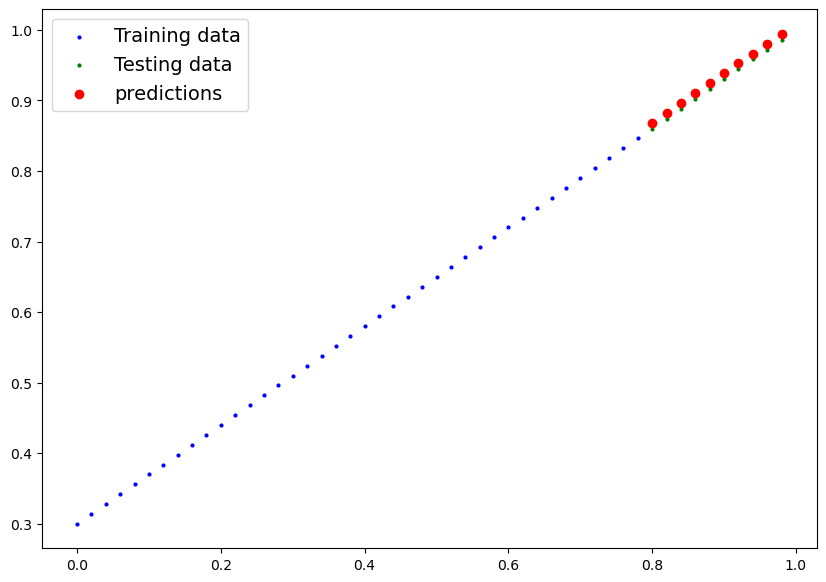

In [21]:
plot_predictions(predictions=test_pred);

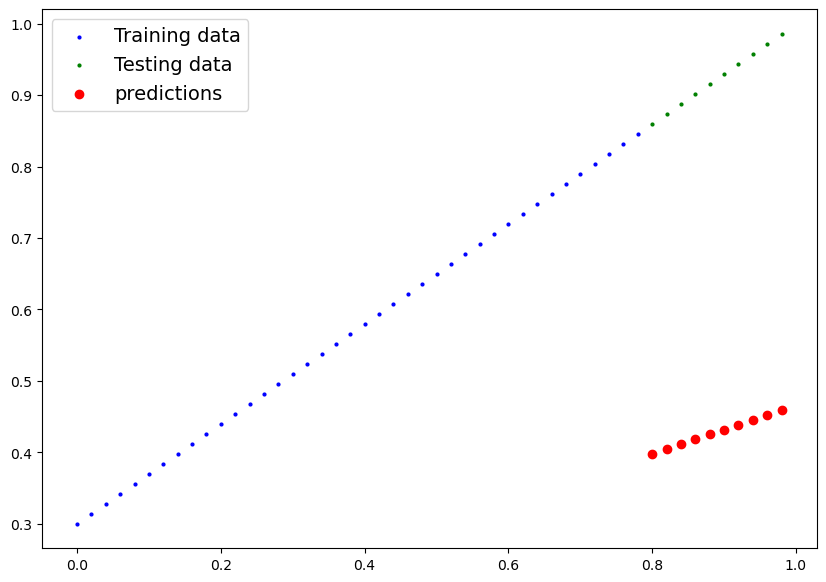

In [22]:
plot_predictions(predictions=y_preds);

### saving a model in pytorch

1. `torch.save()` 
2. `torch.load()`
3. `torch.nn.Module.load_state_dict()`

In [23]:
# saving our pytorch model
from pathlib import Path

#1.create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True , exist_ok=True)

#2.create model save path
MODEL_NAME = "module_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#3.save the model sate dict
print(f"saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=module_0.state_dict(),
           f = MODEL_SAVE_PATH)

saving model to : models\module_0.pth


### loading a PyTorch model

In [24]:
loaded_model_0 = LinearRegressionModel()
#load the saved sate_dict of model 0 
loaded_model_0.load_state_dict(torch.load(f= MODEL_SAVE_PATH))

C:\Users\hksystem\AppData\Local\Temp\ipykernel_273344\3418948548.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f= MODEL_SAVE_

<All keys matched successfully>

In [25]:
# make some predictions 
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [26]:
# make some model preds 
with torch.inference_mode():
    y_preds = module_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [27]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### Review :
0. import relevent libraries and check cuda

In [28]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.4.0'

In [29]:
# setup device agnostic code 
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"using : {device}")

using : cuda


1. preparing data

In [30]:
weight = 0.7
bias = 0.3 

# create range values 
start = 0
end = 1 
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias
X[:10] , y[:10]



(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [31]:
train_split=int(0.8 * len(X))
X_train , y_train = X[:train_split] , y[:train_split]
X_test , y_test = X[train_split:] , y[train_split:]
len(X_train) , len(y_train) , len(X_test) , len(y_test)

(40, 40, 10, 10)

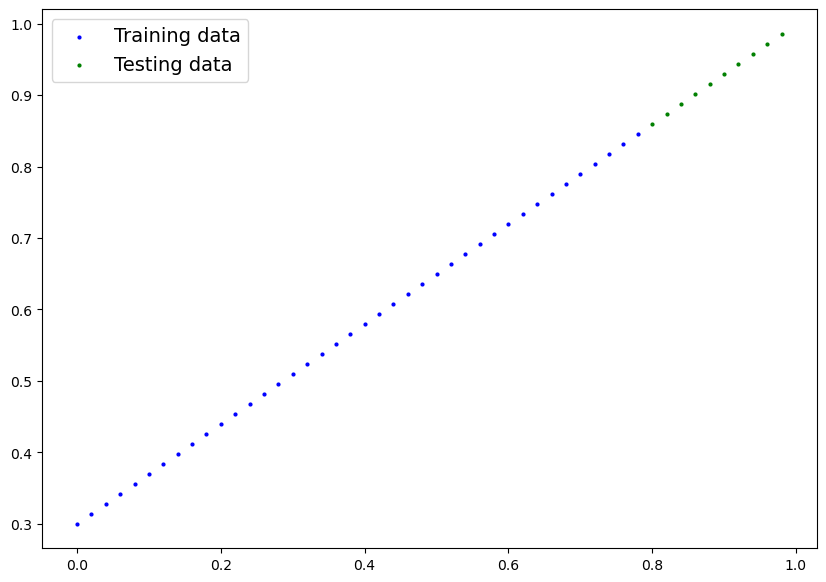

In [32]:
# plot the data 
plot_predictions(X_train , y_train , X_test , y_test)

2. Building a PyTorch model 
* Linear Regression 

In [33]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # use nn.Linear() for crating the model parameters 
        self.linear_layer = nn.Linear(in_features= 1 , out_features= 1)

    def forward(self ,x:torch.Tensor) -> torch.Tensor:
        return self.linear_layer(X)
    
# set the manual seed 
torch.manual_seed(42)
module_1 = LinearRegressionModelV2()
module_1 = module_1.to(device)
module_1 , module_1.state_dict()


(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='cuda:0')),
              ('linear_layer.bias', tensor([0.8300], device='cuda:0'))]))

In [34]:
X_train[:5] , y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [35]:
# check the model current device 
next(module_1.parameters()).device

device(type='cuda', index=0)

In [36]:
module_1.to(device)
next(module_1.parameters()).device

device(type='cuda', index=0)

3. Train the model 
* Loss function 
* optimizer 
* training loop 
* testing loop 

In [37]:
#setup loss function  
loss_fn = nn.L1Loss() #MAE
#setup optimizer 
optimizer = torch.optim.SGD(params=module_1.parameters() , lr=0.01 )


In [38]:
# Training loop 
torch.manual_seed(42)

epochs= 200
module_1 = module_1.to(device)

#put data on the target device 
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    module_1.train()
    
    #1. forward pass
    y_pred = module_1(X_train)
    #2. Calculate error
    loss = loss_fn(y_pred , y_train)

    #3. Optimizer
    optimizer.zero_grad()

    #4. backpropagation
    loss.backward()

    #5. optimizer step 
    optimizer.step()

    ### testing 
    module_1.eval()
    with torch.inference_mode():
        test_pred = module_1(X_test)
        test_loss = loss_fn(test_pred,y_test)
    
    #print out what's happeinig 
    if epoch % 10 == 0 :
        print(f"epoch : {epoch} | Loss : {loss} | test_loss : {test_loss}")


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)